In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\ARTHI\Downloads\cleaned_data.csv")
df.head()

,Text,Fake,Hate,Target,Severity
0,USER Abhi tak 2000 ke note me mujhe GPS nano c...,0,0,0,0
1,USER USER Abe katiye tumse kuch huaa toh jata ...,1,1,2,3
2,USER Ye sab sazish hai bina saman ke koi kaise...,1,1,2,2
3,abe jao tum to dasko pahle hi fash gye the jab...,1,0,1,1
4,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,0,0


In [ ]:
print(df['Text'].isnull().sum())  

3


In [ ]:

df['Text'] = df['Text'].fillna('')  
X_text = df['Text']  
y = df['Fake']  


In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X_text)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [7]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred = nb_classifier.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6953125

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.25      0.38       463
           1       0.69      0.95      0.80       817

    accuracy                           0.70      1280
   macro avg       0.71      0.60      0.59      1280
weighted avg       0.70      0.70      0.65      1280


Confusion Matrix:
 [[117 346]
 [ 44 773]]


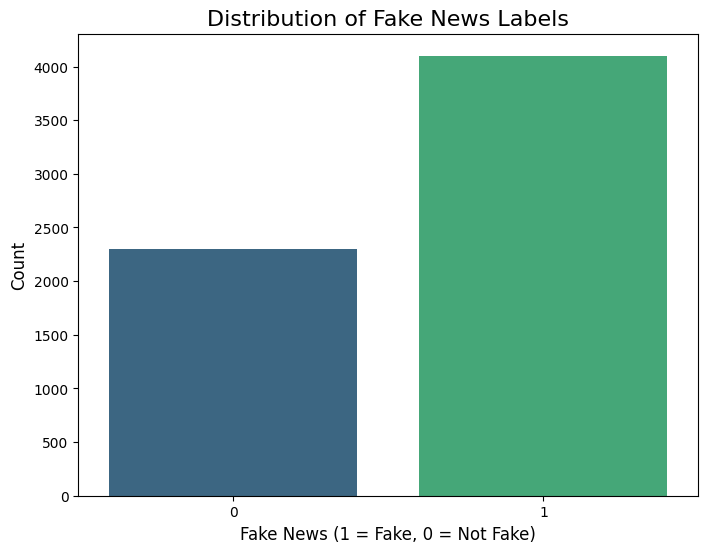

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(8, 6))
sns.countplot(x='Fake', data=df, palette='viridis')
plt.title('Distribution of Fake News Labels', fontsize=16)
plt.xlabel('Fake News (1 = Fake, 0 = Not Fake)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

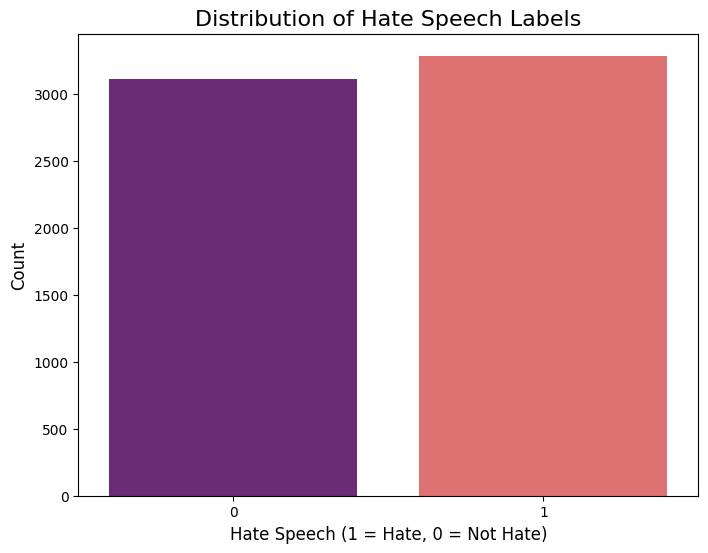

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hate', data=df, palette='magma')
plt.title('Distribution of Hate Speech Labels', fontsize=16)
plt.xlabel('Hate Speech (1 = Hate, 0 = Not Hate)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
text = ' '.join(df['Text'].dropna())  
wordcloud = WordCloud(width=800, height=400, stopwords='english', background_color='white').generate(text)

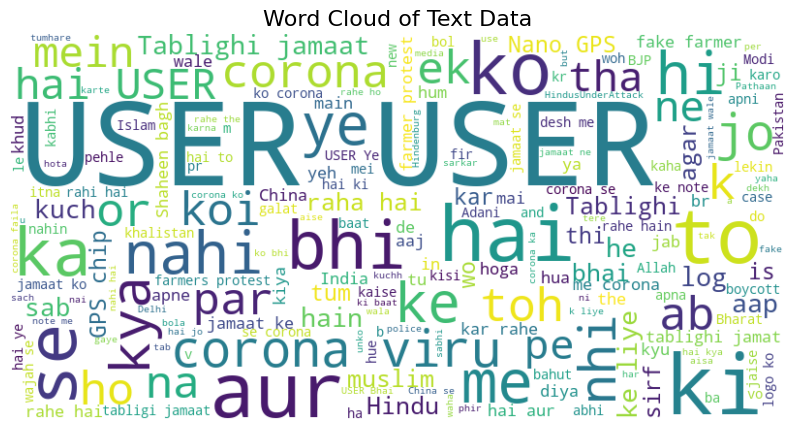

In [14]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()


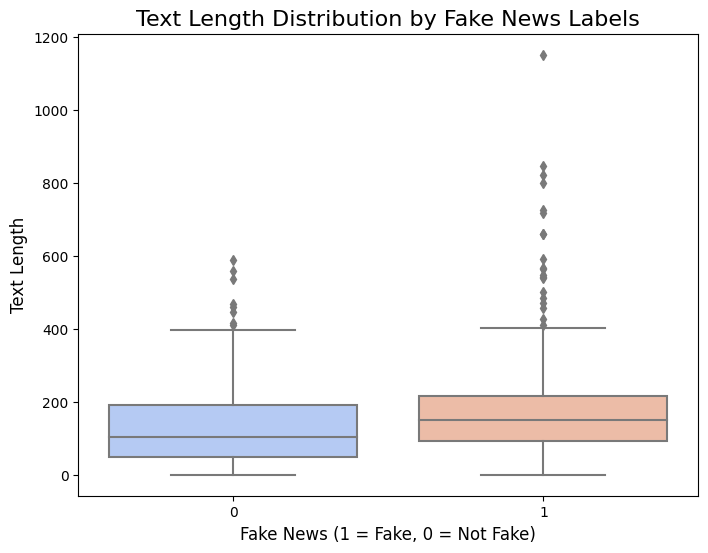

In [15]:
# Visualize the average text length for each label
df['text_length'] = df['Text'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Fake', y='text_length', data=df, palette='coolwarm')
plt.title('Text Length Distribution by Fake News Labels', fontsize=16)
plt.xlabel('Fake News (1 = Fake, 0 = Not Fake)', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.show()

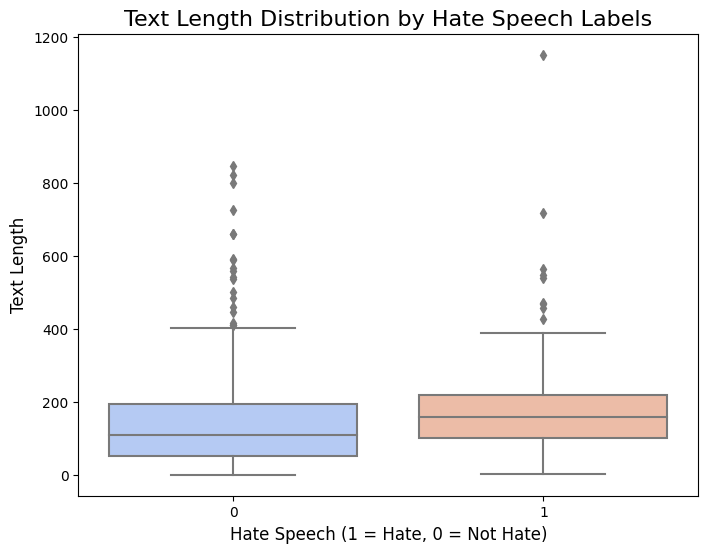

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hate', y='text_length', data=df, palette='coolwarm')
plt.title('Text Length Distribution by Hate Speech Labels', fontsize=16)
plt.xlabel('Hate Speech (1 = Hate, 0 = Not Hate)', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
def preprocess_text(text):
    text = text.lower()
    return text

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=10000, min_df=3, max_df=0.9, stop_words='english')
X_vectorized = vectorizer.fit_transform(df['Text'])

# Balancing Dataset for Fake News (Random Oversampling)
ros = RandomOverSampler(random_state=42)
X_balanced_fake, y_fake_balanced = ros.fit_resample(X_vectorized, df['Fake'])

In [21]:
X_train_fake, X_test_fake, y_train_fake, y_test_fake = train_test_split(X_balanced_fake, y_fake_balanced, test_size=0.2, random_state=42)

# Model Training for Fake News
nb_fake = MultinomialNB(alpha=0.5)
nb_fake.fit(X_train_fake, y_train_fake)

MultinomialNB(alpha=0.5)

In [22]:
y_pred_fake = nb_fake.predict(X_test_fake)
print("Fake News Classification Accuracy:", accuracy_score(y_test_fake, y_pred_fake))
print("\nFake News Classification Report:\n", classification_report(y_test_fake, y_pred_fake))
print("\nFake News Confusion Matrix:\n", confusion_matrix(y_test_fake, y_pred_fake))


Fake News Classification Accuracy: 0.7794028031687995

Fake News Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       838
           1       0.76      0.80      0.78       803

    accuracy                           0.78      1641
   macro avg       0.78      0.78      0.78      1641
weighted avg       0.78      0.78      0.78      1641


Fake News Confusion Matrix:
 [[640 198]
 [164 639]]


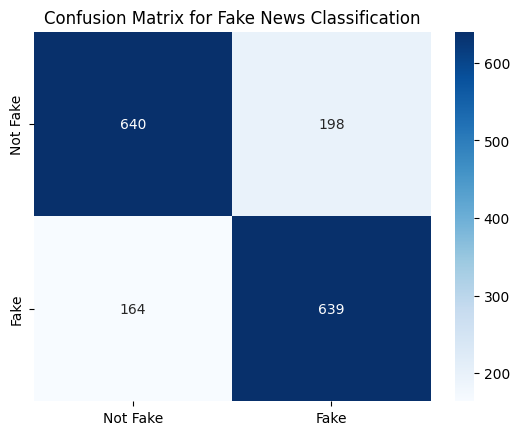

In [23]:
sns.heatmap(confusion_matrix(y_test_fake, y_pred_fake), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('Confusion Matrix for Fake News Classification')
plt.show()


In [ ]:
#  Balancing Dataset for Hate Speech (SMOTE)
smote = SMOTE(random_state=42)
X_balanced_hate, y_balanced_hate = smote.fit_resample(X_vectorized, df['Hate'])

X_train_hate, X_test_hate, y_train_hate, y_test_hate = train_test_split(X_balanced_hate, y_balanced_hate, test_size=0.2, random_state=42)

nb_hate = MultinomialNB()
nb_hate.fit(X_train_hate, y_train_hate)

MultinomialNB()

In [25]:
y_pred_hate = nb_hate.predict(X_test_hate)
print("Hate Speech Classification Accuracy:", accuracy_score(y_test_hate, y_pred_hate))
print("\nHate Speech Classification Report:\n", classification_report(y_test_hate, y_pred_hate))
print("\nHate Speech Confusion Matrix:\n", confusion_matrix(y_test_hate, y_pred_hate))


Hate Speech Classification Accuracy: 0.782509505703422

Hate Speech Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       653
           1       0.79      0.78      0.78       662

    accuracy                           0.78      1315
   macro avg       0.78      0.78      0.78      1315
weighted avg       0.78      0.78      0.78      1315


Hate Speech Confusion Matrix:
 [[515 138]
 [148 514]]


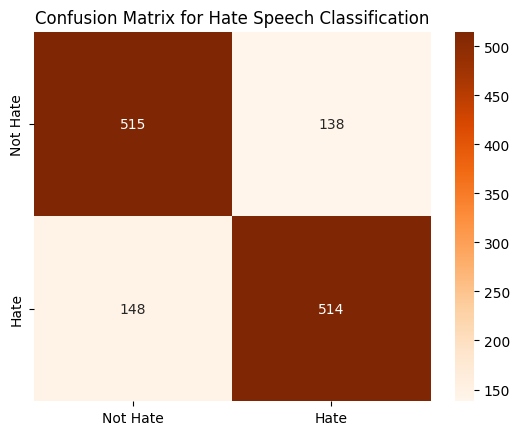

In [27]:
sns.heatmap(confusion_matrix(y_test_hate, y_pred_hate), annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'])
plt.title('Confusion Matrix for Hate Speech Classification')
plt.show()

In [26]:
fake_accuracy = accuracy_score(y_test_fake, y_pred_fake)
hate_accuracy = accuracy_score(y_test_hate, y_pred_hate)
print(f"Final Fake News Accuracy: {fake_accuracy:.4f}")
print(f"Final Hate Speech Accuracy: {hate_accuracy:.4f}")

# Final Evaluation
final_accuracy = (fake_accuracy + hate_accuracy) / 2
print(f"Average Model Accuracy: {final_accuracy:.4f}")

Final Fake News Accuracy: 0.7794
Final Hate Speech Accuracy: 0.7825
Average Model Accuracy: 0.7810


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_fake, tpr_fake, thresholds_fake = roc_curve(y_test_fake, nb_fake.predict_proba(X_test_fake)[:, 1])
roc_auc_fake = auc(fpr_fake, tpr_fake)

fpr_hate, tpr_hate, thresholds_hate = roc_curve(y_test_hate, nb_hate.predict_proba(X_test_hate)[:, 1])
roc_auc_hate = auc(fpr_hate, tpr_hate)

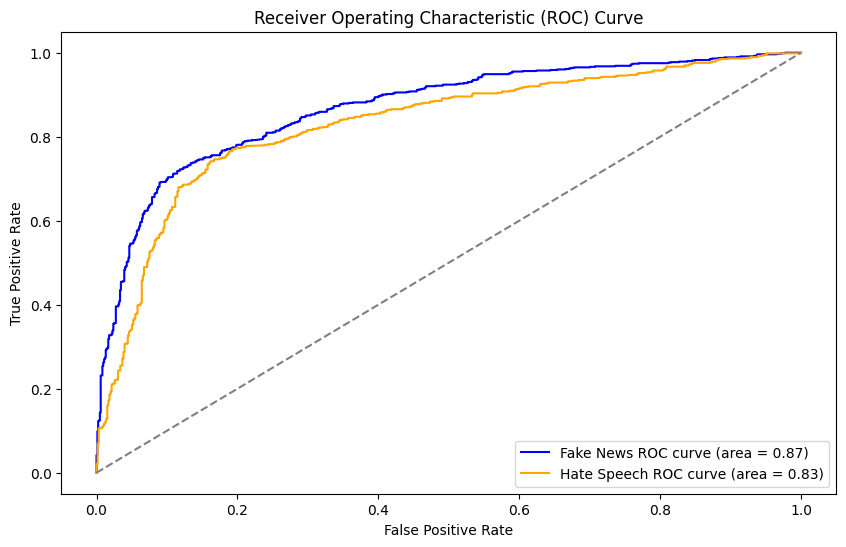

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_fake, tpr_fake, color='blue', label=f'Fake News ROC curve (area = {roc_auc_fake:.2f})')
plt.plot(fpr_hate, tpr_hate, color='orange', label=f'Hate Speech ROC curve (area = {roc_auc_hate:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

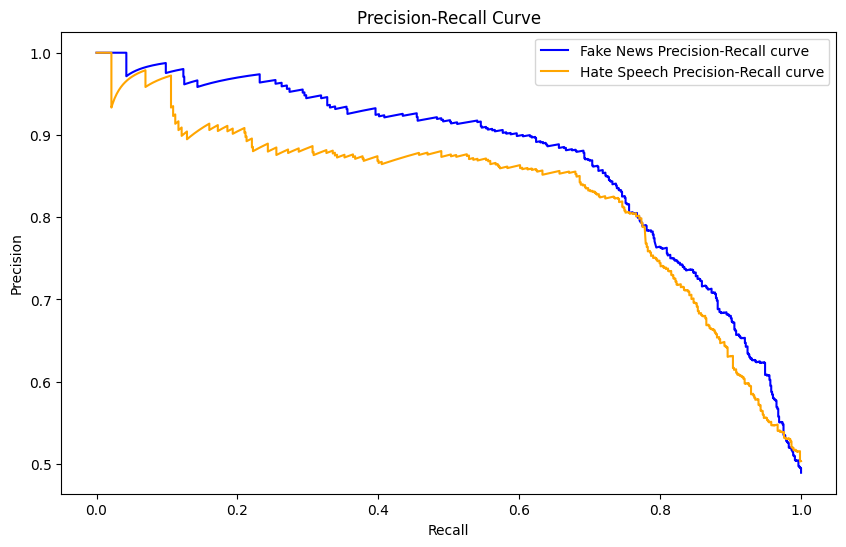

In [ ]:
from sklearn.metrics import precision_recall_curve


precision_fake, recall_fake, _ = precision_recall_curve(y_test_fake, nb_fake.predict_proba(X_test_fake)[:, 1])

precision_hate, recall_hate, _ = precision_recall_curve(y_test_hate, nb_hate.predict_proba(X_test_hate)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(recall_fake, precision_fake, color='blue', label=f'Fake News Precision-Recall curve')
plt.plot(recall_hate, precision_hate, color='orange', label=f'Hate Speech Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


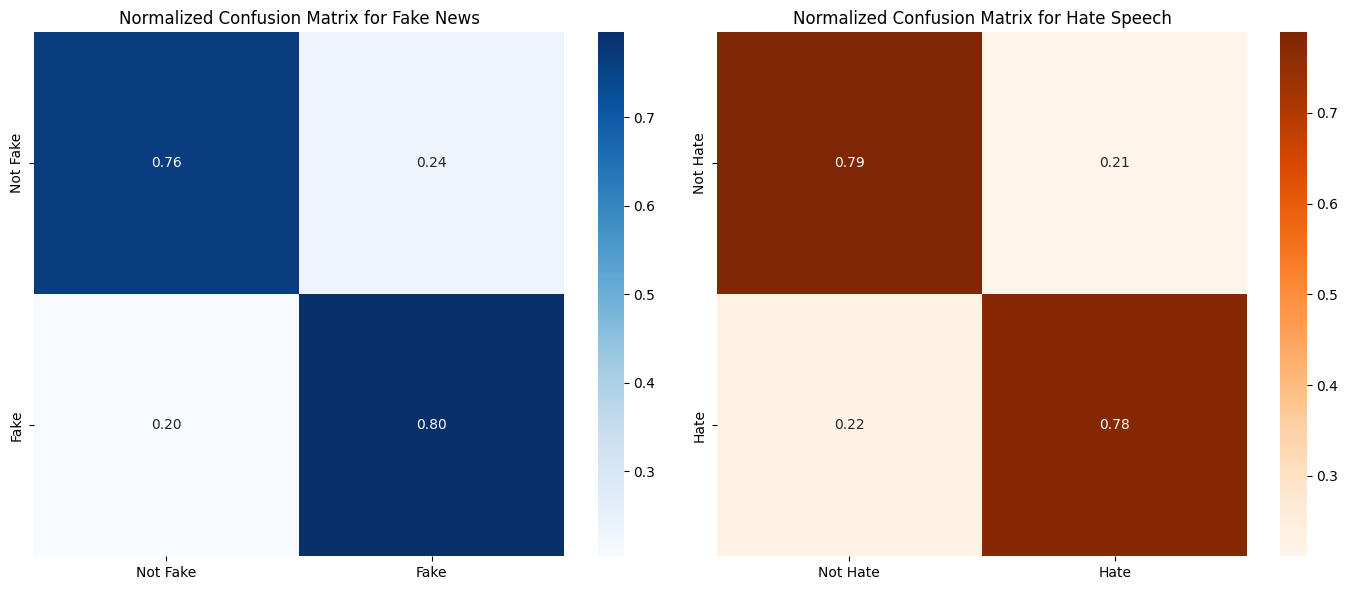

In [ ]:

cm_fake = confusion_matrix(y_test_fake, y_pred_fake, labels=[0, 1])
cm_fake_normalized = cm_fake.astype('float') / cm_fake.sum(axis=1)[:, np.newaxis]

cm_hate = confusion_matrix(y_test_hate, y_pred_hate, labels=[0, 1])
cm_hate_normalized = cm_hate.astype('float') / cm_hate.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm_fake_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'], ax=axes[0])
axes[0].set_title('Normalized Confusion Matrix for Fake News')

sns.heatmap(cm_hate_normalized, annot=True, fmt='.2f', cmap='Oranges', xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'], ax=axes[1])
axes[1].set_title('Normalized Confusion Matrix for Hate Speech')

plt.tight_layout()
plt.show()


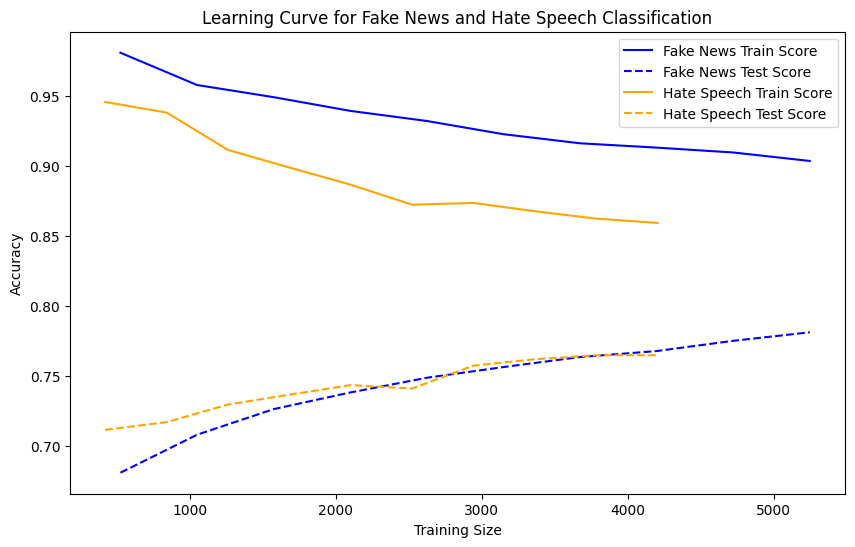

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes_fake, train_scores_fake, test_scores_fake = learning_curve(
    nb_fake, X_train_fake, y_train_fake, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

train_sizes_hate, train_scores_hate, test_scores_hate = learning_curve(
    nb_hate, X_train_hate, y_train_hate, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_fake, np.mean(train_scores_fake, axis=1), label='Fake News Train Score', color='blue')
plt.plot(train_sizes_fake, np.mean(test_scores_fake, axis=1), label='Fake News Test Score', color='blue', linestyle='--')

plt.plot(train_sizes_hate, np.mean(train_scores_hate, axis=1), label='Hate Speech Train Score', color='orange')
plt.plot(train_sizes_hate, np.mean(test_scores_hate, axis=1), label='Hate Speech Test Score', color='orange', linestyle='--')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Fake News and Hate Speech Classification')
plt.legend()
plt.show()


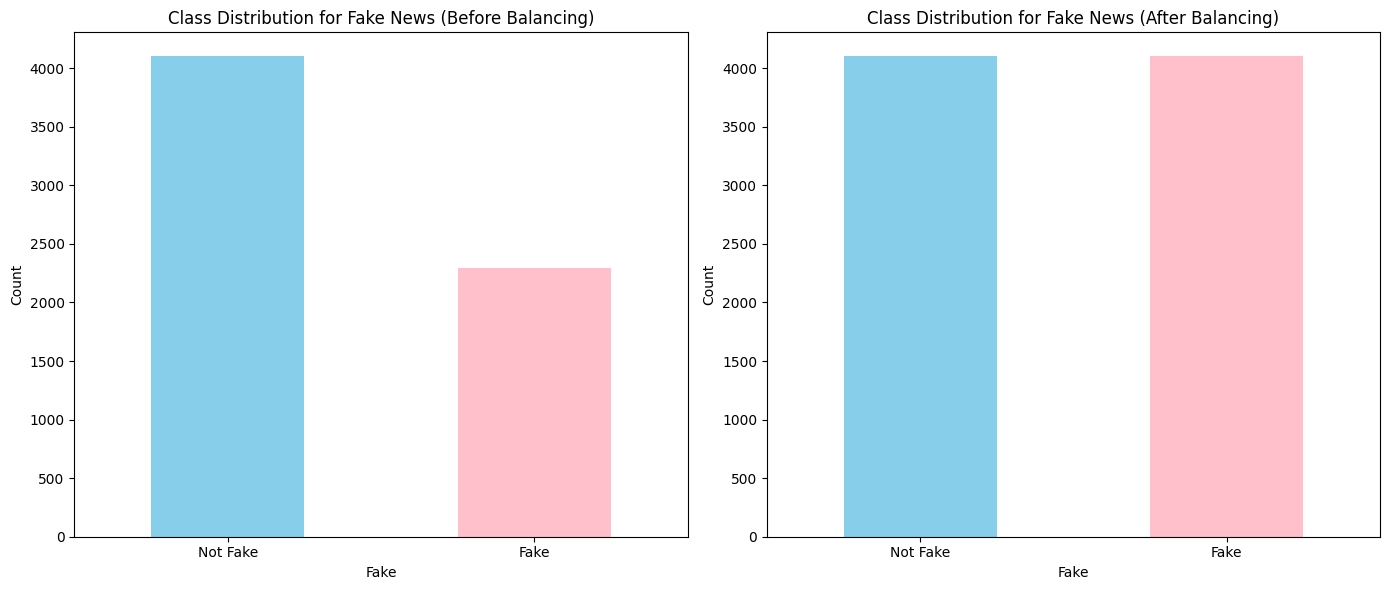

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['Fake'].value_counts().plot(kind='bar', color=['skyblue', 'pink'], ax=axes[0])
axes[0].set_title('Class Distribution for Fake News (Before Balancing)')
axes[0].set_xticklabels(['Not Fake', 'Fake'], rotation=0)
axes[0].set_ylabel('Count')

pd.Series(y_fake_balanced).value_counts().plot(kind='bar', color=['skyblue', 'pink'], ax=axes[1])
axes[1].set_title('Class Distribution for Fake News (After Balancing)')
axes[1].set_xticklabels(['Not Fake', 'Fake'], rotation=0)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
